# Finding data insight

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Dataset/online_retail_II.csv', parse_dates=['InvoiceDate'])

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
df = df[~df['Invoice'].str.startswith('C')]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df = df.dropna()
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
invalid_codes = [item for item in set(df['StockCode']) if not item[0].isdigit()]
invalid_codes

['BANK CHARGES',
 'TEST002',
 'C2',
 'ADJUST',
 'PADS',
 'POST',
 'DOT',
 'M',
 'D',
 'TEST001',
 'ADJUST2',
 'SP1002']

In [7]:
df = df[~df['StockCode'].isin(invalid_codes)]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df.insert(df.shape[1], 'Sum', df['Quantity'] * df['Price'])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sum
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [10]:
df.insert(df.shape[1], 'Week', df['InvoiceDate'].dt.isocalendar().week)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sum,Week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,49
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,49
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,49
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,49
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,49
...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,49
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,49
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,49
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,49


In [38]:
stat_df = df[['StockCode', 'Week', 'Sum']].groupby(['StockCode', 'Week']).sum()
stat_df = stat_df.reset_index()
stat_df

,StockCode,Week,Sum
0,10002,1,73.95
1,10002,2,198.05
2,10002,3,97.75
3,10002,4,50.15
4,10002,5,125.80
...,...,...,...
124033,90214Z,20,1.25
124034,90214Z,25,1.25
124035,90214Z,44,2.50
124036,90214Z,49,3.48


In [39]:
data_df = stat_df.pivot(index='StockCode', columns='Week', values='Sum').fillna(0)
data_df

Week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,73.95,198.05,97.75,50.15,125.80,37.40,40.8,167.45,333.90,20.40,...,44.20,144.50,3.40,534.55,39.95,123.25,293.25,50.15,30.60,11.05
10080,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.70,0.00,0.00,...,0.78,9.36,9.36,7.09,10.53,0.00,3.40,0.00,0.00,0.00
10109,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.68,0.00,0.00,0.00
10120,6.30,0.00,0.00,0.00,0.00,0.00,6.3,0.00,15.33,4.62,...,2.31,11.76,0.00,1.68,9.66,5.46,26.25,0.84,0.42,0.00
10123C,0.00,0.65,7.80,7.80,0.00,0.65,7.8,0.00,1.95,0.00,...,0.65,10.40,0.00,3.90,0.00,1.30,0.65,9.10,68.43,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214U,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,1.25,0.00,0.00,0.00,0.00,3.48,0.00,0.00,0.00
90214V,0.00,0.00,0.00,0.00,1.25,0.00,0.0,0.00,0.00,0.00,...,0.00,2.50,0.00,0.00,0.00,2.50,3.48,0.00,0.00,0.00
90214W,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,1.25,0.00,0.00,0.00,0.00,3.48,0.00,0.00,0.00


In [90]:
scale_df = data_df.div(data_df.max(axis=1) - data_df.min(axis=1), axis=0)

In [91]:
scale_df

Week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.098521,0.263856,0.130229,0.066813,0.167599,0.049827,0.054357,0.223088,0.444844,0.027178,...,0.058886,0.192513,0.00453,0.712164,0.053224,0.164202,0.390687,0.066813,0.040767,0.014722
10080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090812,0.000000,0.000000,...,0.041667,0.500000,0.50000,0.378739,0.562500,0.000000,0.181624,0.000000,0.000000,0.000000
10109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
10120,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.000000,0.584000,0.176000,...,0.088000,0.448000,0.00000,0.064000,0.368000,0.208000,1.000000,0.032000,0.016000,0.000000
10123C,0.000000,0.009499,0.113985,0.113985,0.000000,0.009499,0.113985,0.000000,0.028496,0.000000,...,0.009499,0.151980,0.00000,0.056993,0.000000,0.018998,0.009499,0.132983,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214U,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.359195,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
90214V,0.000000,0.000000,0.000000,0.000000,0.359195,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.718391,0.00000,0.000000,0.000000,0.718391,1.000000,0.000000,0.000000,0.000000
90214W,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.359195,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [13]:
from sklearn.cluster import KMeans

In [14]:
MIN_K = 2
MAX_K = 20

In [106]:
results_kmeans = {}

for k in range(MIN_K, MAX_K+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scale_df)
    results_kmeans[k] = {
        'labels': kmeans.labels_,
        'centroids': kmeans.cluster_centers_,
        'inertia': kmeans.inertia_,
        'n_iter': kmeans.n_iter_
    }
    print('{}-means: with {} iterations , Inertia={}'.format(k, results_kmeans[k]['n_iter'], results_kmeans[k]['inertia']))

2-means: with 12 iterations , Inertia=9976.897070610688
3-means: with 15 iterations , Inertia=9338.497023775171
4-means: with 23 iterations , Inertia=9010.24230194893
5-means: with 26 iterations , Inertia=8769.452108291769
6-means: with 29 iterations , Inertia=8589.142428032792
7-means: with 32 iterations , Inertia=8440.535500425929
8-means: with 31 iterations , Inertia=8291.679025852012
9-means: with 49 iterations , Inertia=8166.3272725231745
10-means: with 33 iterations , Inertia=8052.892016363533
11-means: with 53 iterations , Inertia=7967.719083359063
12-means: with 40 iterations , Inertia=7889.64336091257
13-means: with 59 iterations , Inertia=7786.384753645216
14-means: with 51 iterations , Inertia=7686.133708150099
15-means: with 35 iterations , Inertia=7649.447891656617
16-means: with 72 iterations , Inertia=7519.571601941893
17-means: with 41 iterations , Inertia=7469.771212626608
18-means: with 48 iterations , Inertia=7439.830871268896
19-means: with 44 iterations , Inertia=7

In [107]:
from matplotlib import pyplot as plt

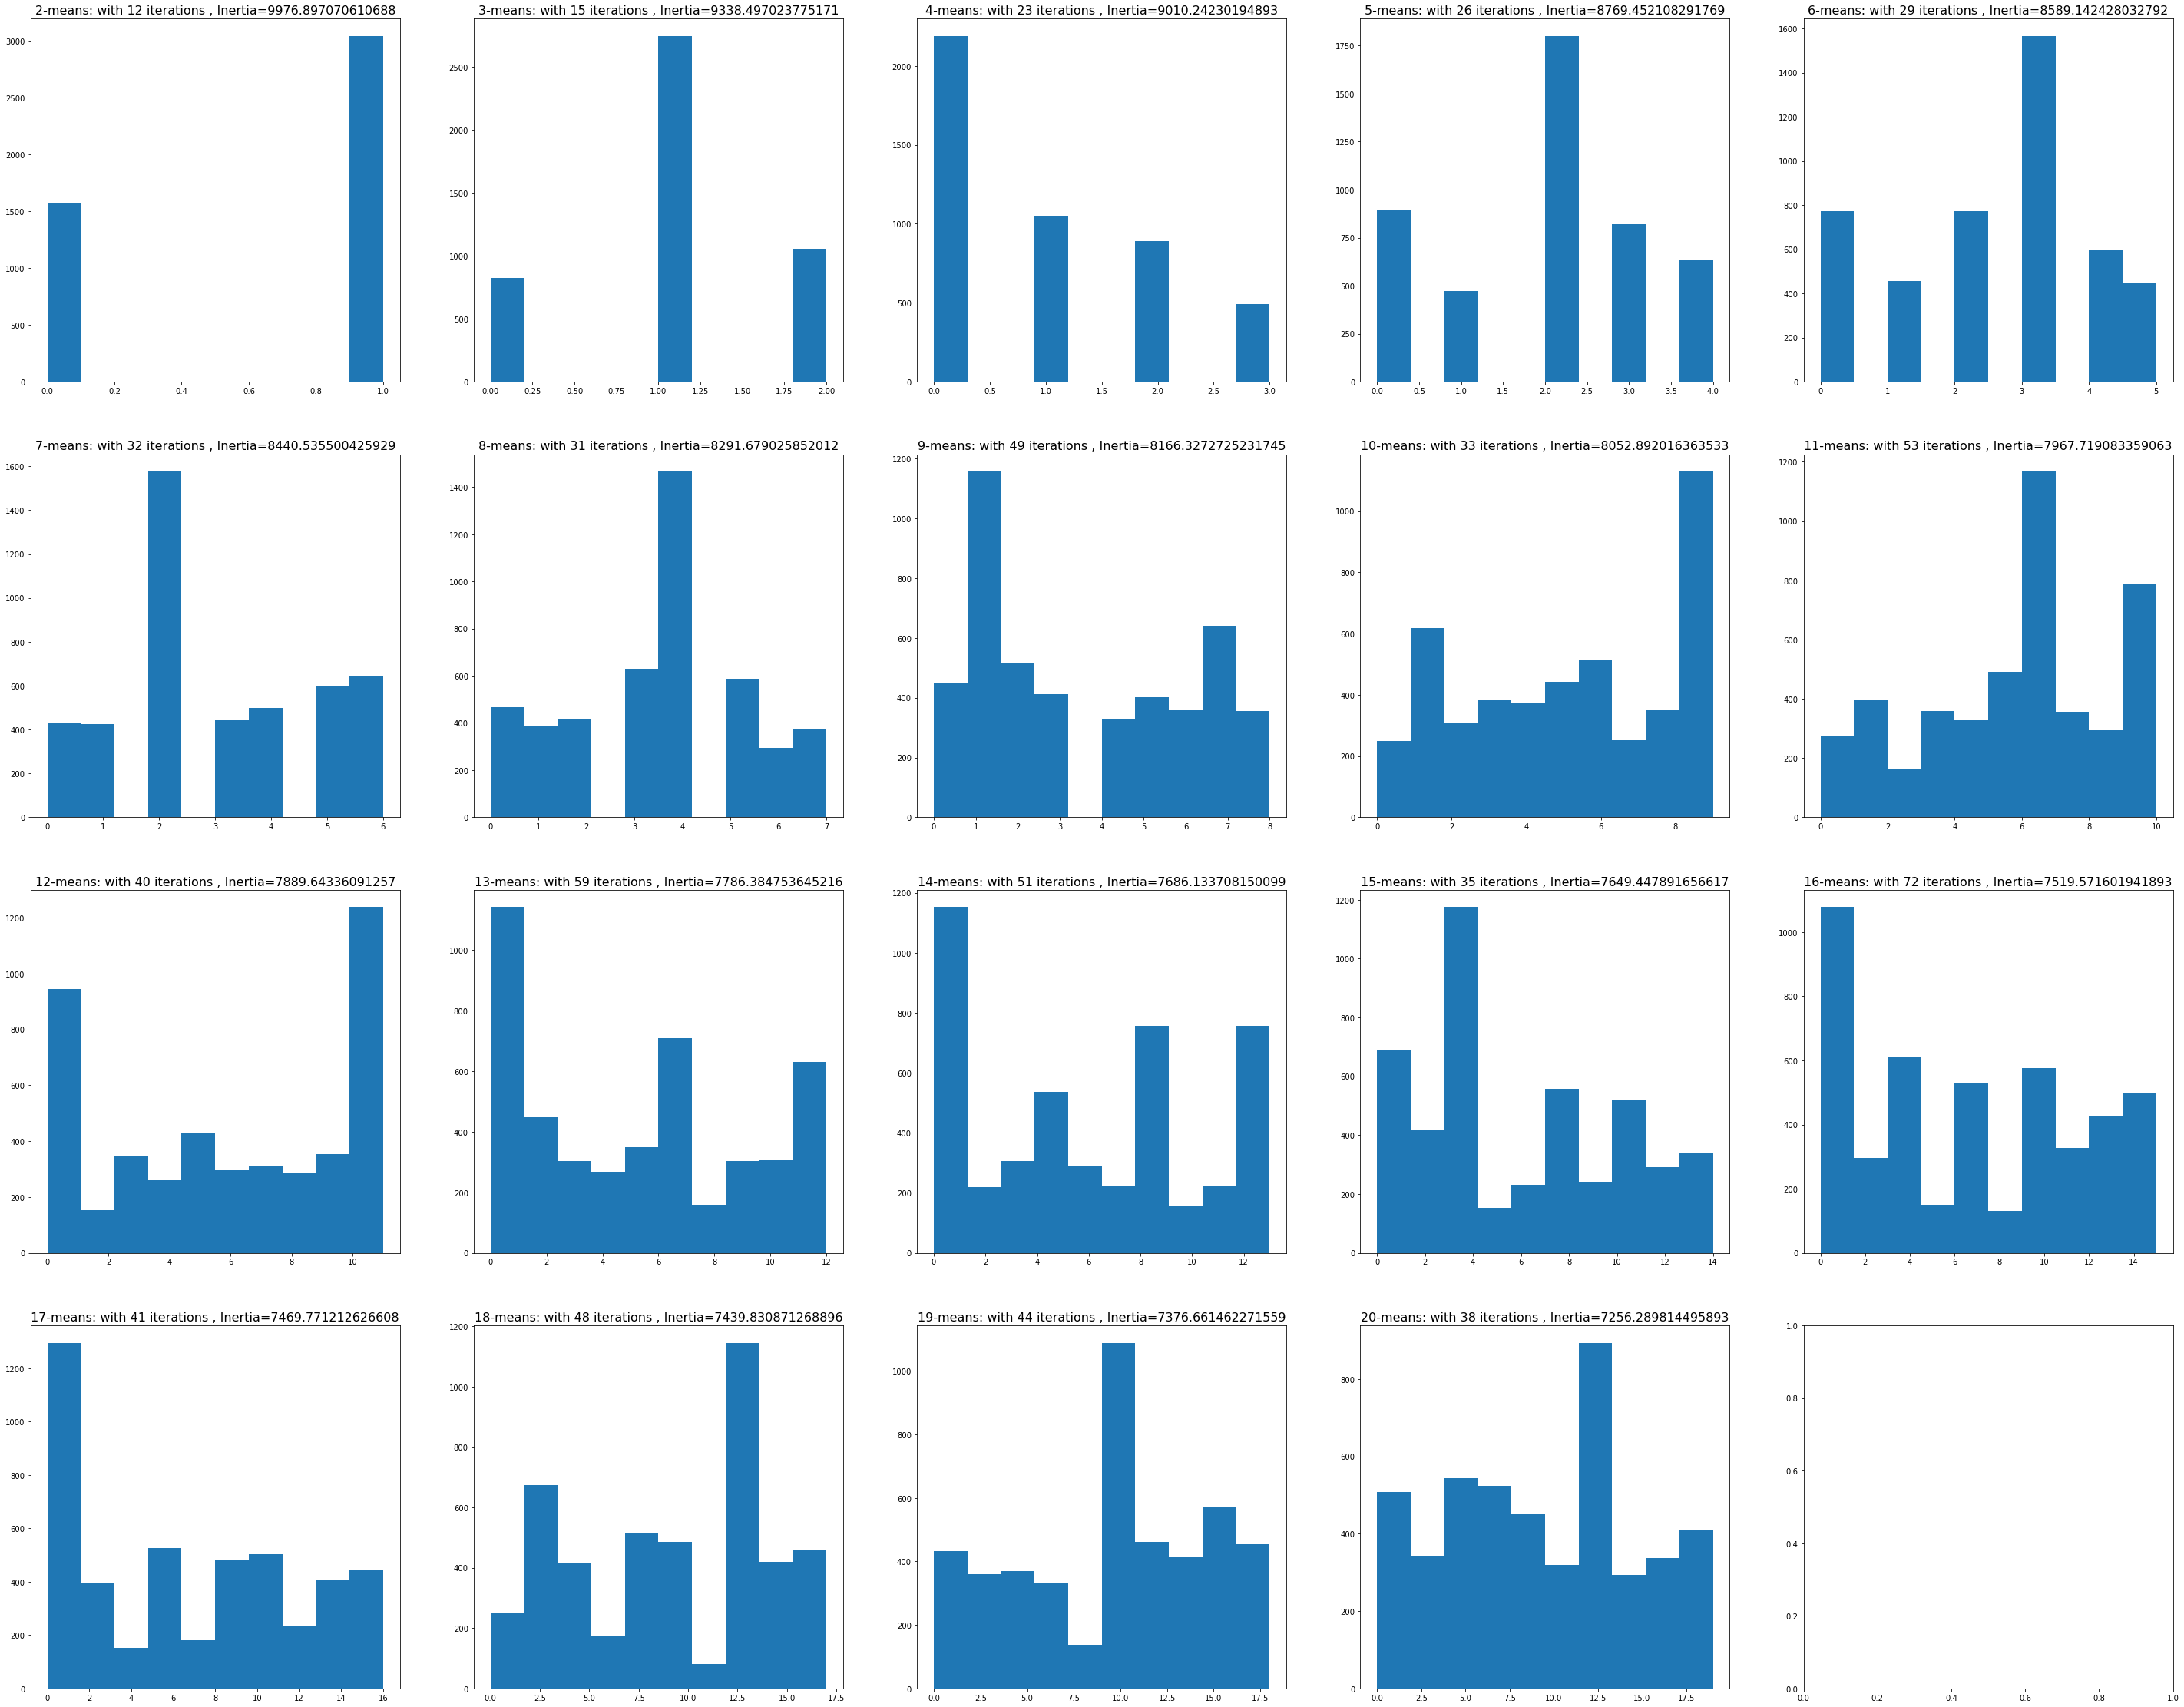

In [108]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k-1) // ncols + 1

fig, ax = plt.subplots(nrows, ncols, figsize=(10*ncols,10*nrows))
for i, k in enumerate(results_kmeans):
    row = i // 5
    col = i % 5
    
    ax[row,col].hist(results_kmeans[k]['labels'])
    ax[row,col].set_title('{}-means: with {} iterations , Inertia={}'.format(k, results_kmeans[k]['n_iter'], results_kmeans[k]['inertia']), fontsize=16)
plt.show()

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

In [109]:
stock_2d = pca.fit_transform(scale_df)

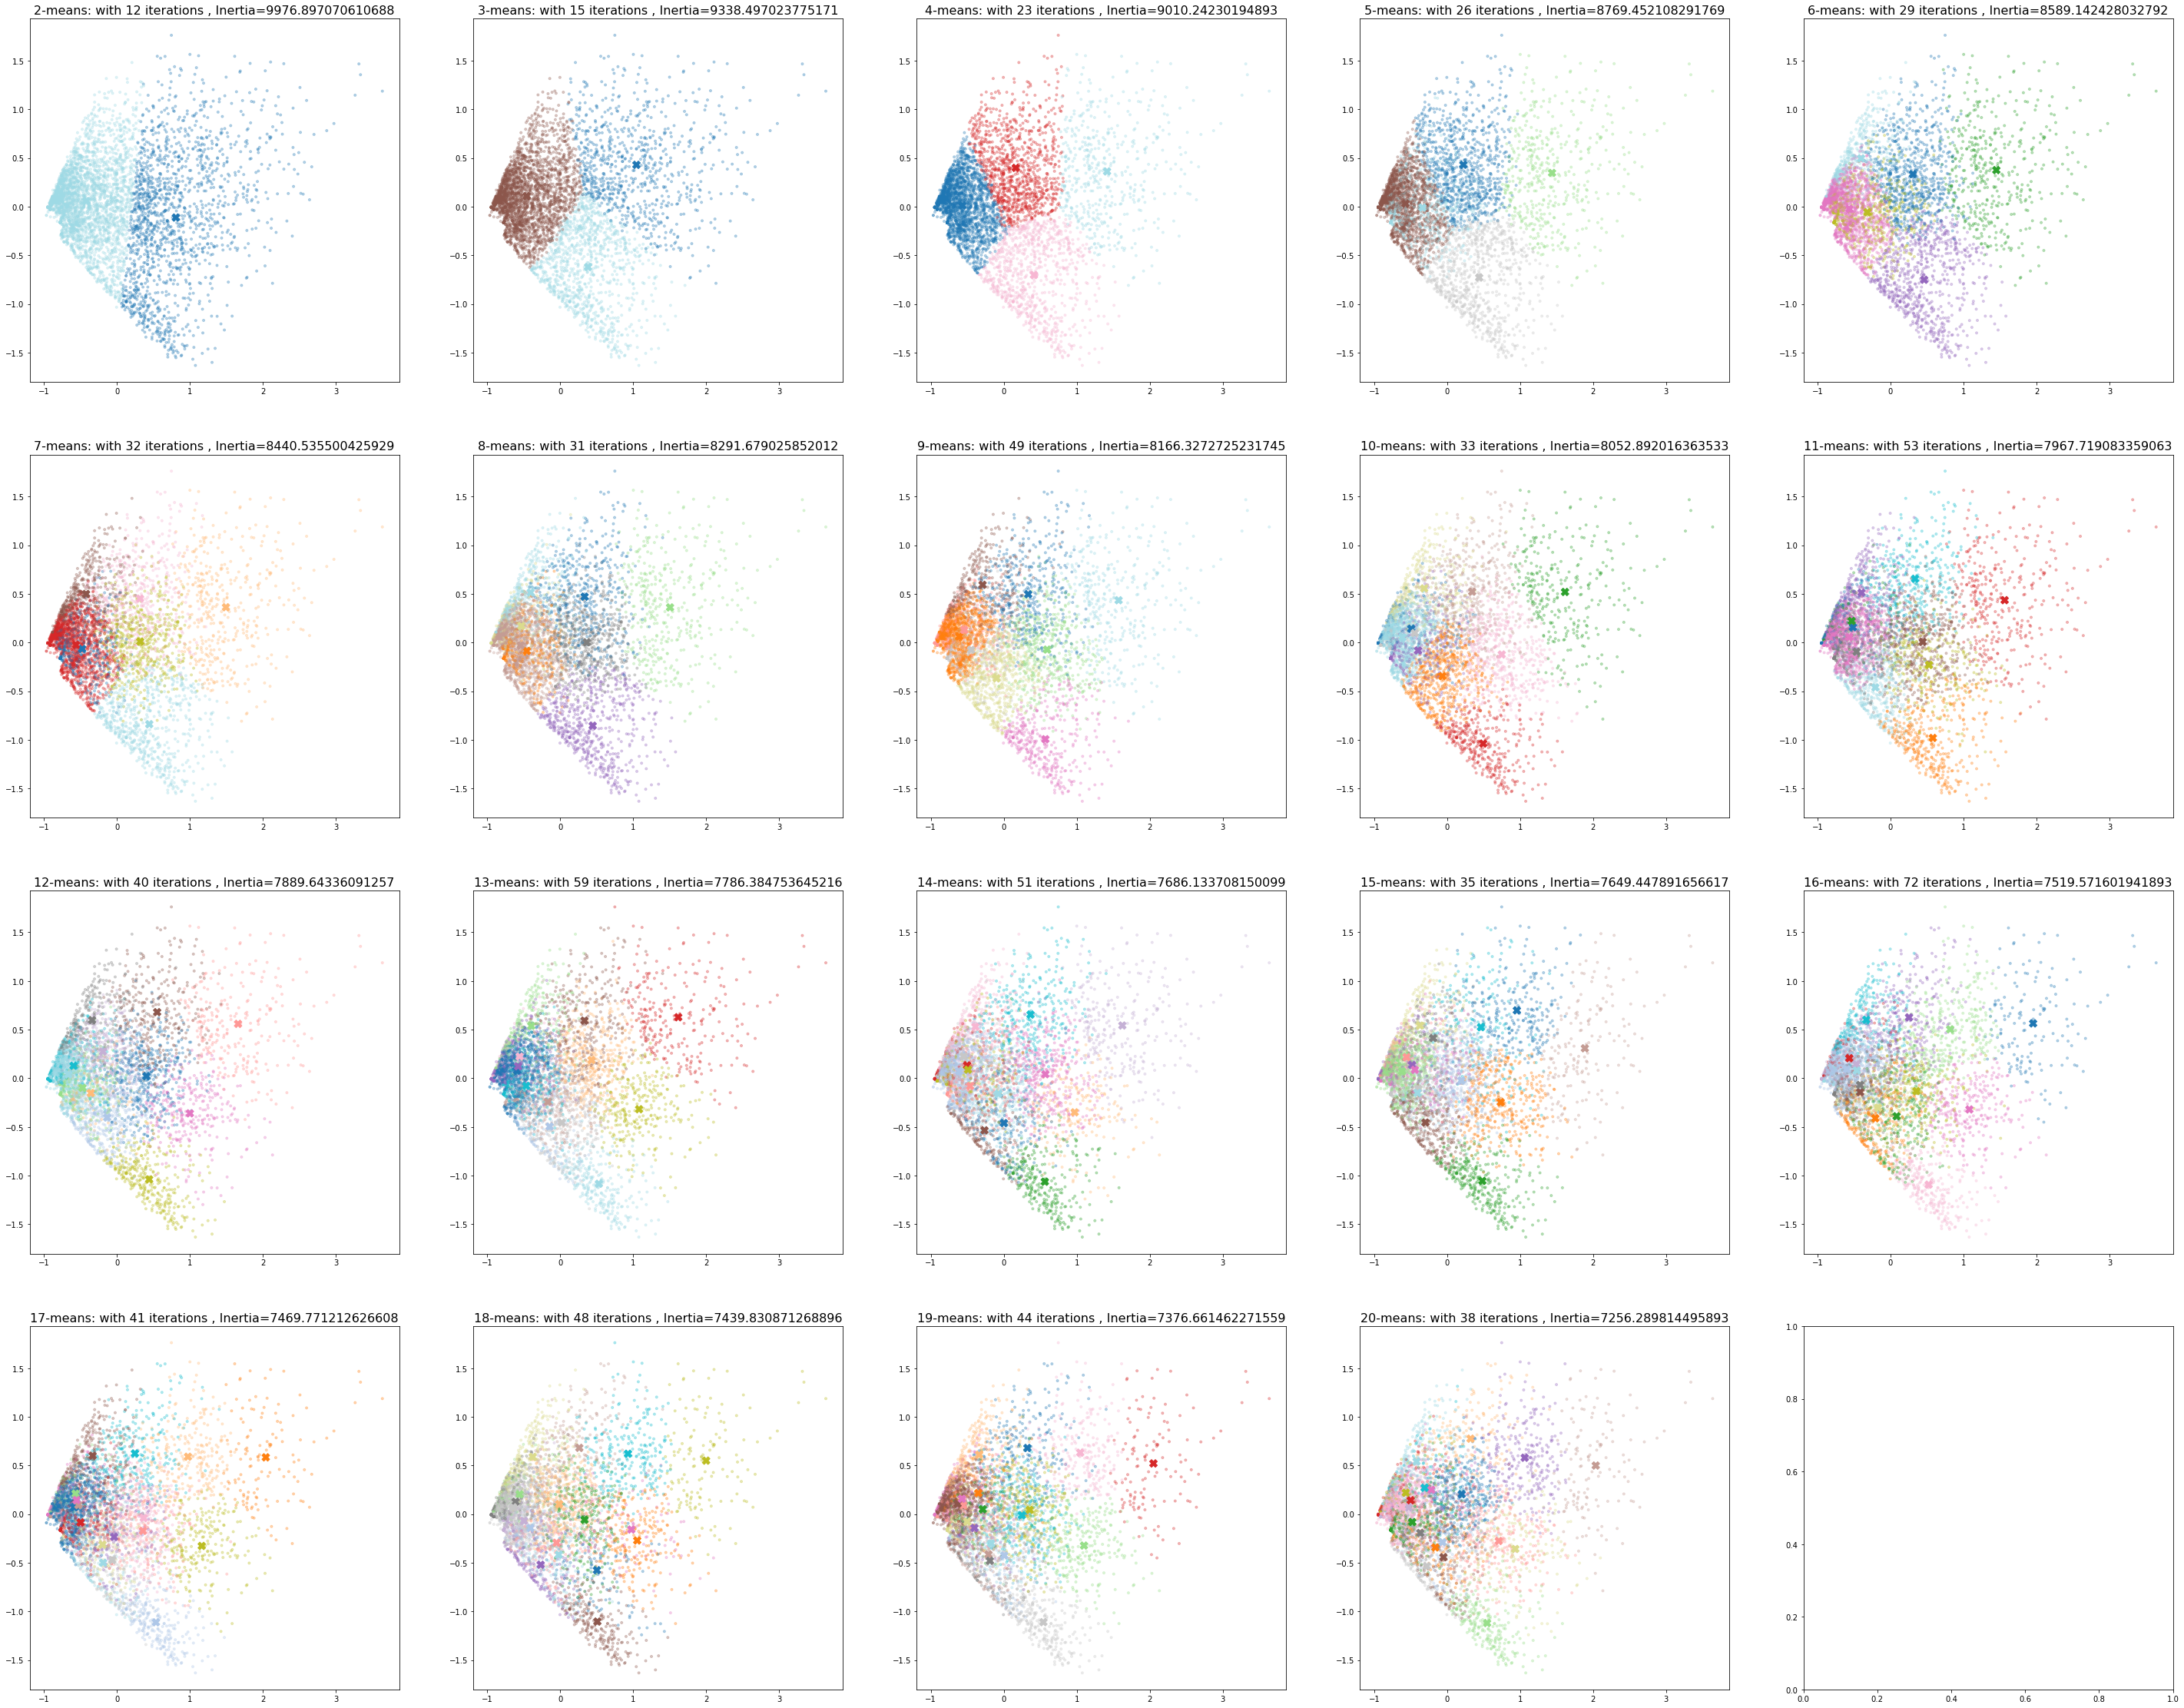

In [110]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k-1) // ncols + 1

fig, ax = plt.subplots(nrows, ncols, figsize=(10*ncols,10*nrows))
for i, k in enumerate(results_kmeans):
    row = i // 5
    col = i % 5
    
    centroids = pca.transform(results_kmeans[k]['centroids'])

    ax[row,col].scatter(x=stock_2d[:,0], y=stock_2d[:,1], marker='.', c=results_kmeans[k]['labels'], alpha=.3, cmap='tab20')
    ax[row,col].scatter(x=centroids[:,0], y=centroids[:,1], c=range(k), marker='X', s=100, cmap='tab20')
    ax[row,col].set_title('{}-means: with {} iterations , Inertia={}'.format(k, results_kmeans[k]['n_iter'], results_kmeans[k]['inertia']), fontsize=16)
plt.show()

In [111]:
clusters = {}
for i in set(results_kmeans[20]['labels']):
    clusters[i] = data_df.iloc[np.where(results_kmeans[20]['labels'] == i)]
#     print(i, clusters[i].sum(axis=1))
    print('Cluster {} has {} items'.format(i, data_df.loc[clusters[i].index].shape[0]))

Cluster 0 has 347 items
Cluster 1 has 161 items
Cluster 2 has 170 items
Cluster 3 has 173 items
Cluster 4 has 284 items
Cluster 5 has 259 items
Cluster 6 has 210 items
Cluster 7 has 313 items
Cluster 8 has 261 items
Cluster 9 has 190 items
Cluster 10 has 183 items
Cluster 11 has 136 items
Cluster 12 has 134 items
Cluster 13 has 760 items
Cluster 14 has 112 items
Cluster 15 has 181 items
Cluster 16 has 149 items
Cluster 17 has 188 items
Cluster 18 has 149 items
Cluster 19 has 259 items


In [112]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
clusters[5]

Week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
StockCode,,,,,,,,,,,,,,,,,,,,,
16169E,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,84.00,208.50,241.50,63.00,136.50,105.42,105.00,0.00,0.00,0.00
20956,0.00,15.00,3.75,15.00,0.0,0.0,21.25,0.00,15.00,3.75,...,412.30,135.00,210.00,191.25,115.00,100.00,116.25,135.00,82.50,0.00
21011,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,60.71,56.99,110.64,130.94,96.96,14.50,66.70,80.19,50.77,0.00
21015,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,20.60,43.87,50.96,48.13,57.42,31.54,23.75,6.80,0.00,0.00
21147,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,64.86,79.20,112.14,14.04,52.56,29.82,4.56,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84754,0.00,152.64,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,193.82,53.75,297.57,78.75,140.00,187.50,310.07,58.75,18.75,5.00
85048,7.95,7.95,0.00,0.00,83.4,0.0,0.00,0.00,0.00,0.00,...,433.20,1577.40,2882.35,1112.55,1896.00,1829.30,1629.30,298.05,321.90,7.95
85049A,2.50,0.00,16.25,0.00,45.0,7.5,0.00,3.75,13.75,2.50,...,427.38,546.23,554.70,337.10,212.26,553.23,424.64,286.25,178.75,11.25


In [113]:
df[df['StockCode'].isin(clusters[5].index)]['Description']

0          15CM CHRISTMAS GLASS BALL 20 LIGHTS
17                CHRISTMAS CRAFT WHITE FAIRY 
32             CHRISTMAS CRAFT HEART STOCKING 
33            PARTY CONE CHRISTMAS DECORATION 
37               EUCALYPTUS & PINECONE  WREATH
                          ...                 
1067316                   CARD MOTORBIKE SANTA
1067317              SCANDINAVIAN REDS RIBBONS
1067339                  LOVE HOT WATER BOTTLE
1067348     SET 6 SCHOOL MILK BOTTLES IN CRATE
1067352       SET OF 3 HANGING OWLS OLLIE BEAK
Name: Description, Length: 66199, dtype: object

In [99]:
clusters[18]

Week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
StockCode,,,,,,,,,,,,,,,,,,,,,
16008,0.0,0.00,0.00,0.00,0.00,5.00,0.0,0.00,0.00,18.0,...,20.16,50.52,18.38,20.08,3.13,46.44,38.44,3.00,0.0,0.0
16010,0.0,0.24,0.00,0.00,1.44,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,2.88,0.00,0.00,0.0,0.0
17012D,0.0,0.00,15.30,5.10,0.00,0.00,0.0,0.00,0.00,15.3,...,25.50,0.00,37.40,39.10,24.65,45.05,41.65,2.55,0.0,0.0
17012F,0.0,0.00,0.00,0.00,0.00,0.00,0.0,2.55,20.40,0.0,...,20.40,25.50,139.40,23.80,18.70,27.20,38.25,14.55,0.0,0.0
17021,0.0,144.00,1.80,1.80,10.80,12.60,5.4,25.20,154.80,0.0,...,16.20,0.00,28.50,16.20,14.40,288.00,12.00,14.40,10.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90133,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,14.85,0.00,24.75,19.80,0.00,0.00,4.95,0.0,0.0
90152B,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,11.90,0.00,0.00,11.90,5.95,0.00,0.0,0.0
90164A,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,11.70,0.00,0.00,13.65,0.00,0.00,0.0,0.0


In [100]:
df[df['StockCode'].isin(clusters[18].index)]['Description']

61          CHARLIE+LOLA RED HOT WATER BOTTLE 
64         CHARLIE + LOLA RED HOT WATER BOTTLE
94              RED WOOLLY HOTTIE WHITE HEART.
262           DIAMANTE BOW BROOCH BLACK COLOUR
288        CHARLIE + LOLA RED HOT WATER BOTTLE
                          ...                 
1067307                    EGG FRYING PAN RED 
1067327        6 CHOCOLATE LOVE HEART T-LIGHTS
1067329        6 CHOCOLATE LOVE HEART T-LIGHTS
1067335                     RABBIT NIGHT LIGHT
1067350         FAIRY TALE COTTAGE NIGHT LIGHT
Name: Description, Length: 32945, dtype: object

In [101]:
results_kmeans[20]['labels'][:10]

array([14,  6,  1,  1, 19, 15,  1, 15,  3, 16])